# **Problem statement:**
Build a machine learning model to predict if an applicant is 'good' or 'bad' client

1.application_record.csv contains appliers personal information, which you could use as features for predicting.

2.credit_record.csv records users' behaviors of credit card.


Import required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Read Train and Test Data

In [ ]:
df_application_rec = pd.read_excel('/content/drive/MyDrive/intenship/Credit card approval prediction/application_record.xlsx')
df_credit_rec = pd.read_excel('/content/drive/MyDrive/intenship/Credit card approval prediction/credit_record.xlsx')


Understanding the Data

In [ ]:
df_application_rec.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1,0.0,0.0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,NaN,1,0.0,1.0,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1,0.0,1.0,1,Sales staff,1


In [ ]:
df_application_rec.shape


(438557, 18)

In [ ]:
df_credit_rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0.0,X
1,5001711,-1.0,0
2,5001711,-2.0,0
3,5001711,-3.0,0
4,5001712,0.0,C


In [ ]:
df_credit_rec.shape

(1048575, 3)

In [ ]:
df_application_rec.columns


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
df_credit_rec.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [ ]:
df = df_application_rec.merge(df_credit_rec, on=['ID'], how='inner')

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,-4.0,C


In [ ]:
df.shape

(777715, 20)

In [ ]:
df['MONTHS_BALANCE'] = abs(df['MONTHS_BALANCE'])

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1,1.0,0.0,0,NaN,2,4.0,C


In [ ]:
df.shape

(777715, 20)

In [ ]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL               int64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
MONTHS_BALANCE         float64
STATUS                  object
dtype: object

In [ ]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR               16
FLAG_OWN_REALTY            51
CNT_CHILDREN                0
AMT_INCOME_TOTAL           32
NAME_INCOME_TYPE           37
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE         107
DAYS_BIRTH                341
DAYS_EMPLOYED             188
FLAG_MOBIL                  0
FLAG_WORK_PHONE            30
FLAG_PHONE                 40
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [ ]:
df['FLAG_OWN_CAR'].fillna(df['FLAG_OWN_CAR'].mode()[0],inplace=True)
df['FLAG_OWN_REALTY'].fillna(df['FLAG_OWN_REALTY'].mode()[0],inplace=True)
df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0],inplace=True)
df['NAME_HOUSING_TYPE'].fillna(df['NAME_HOUSING_TYPE'].mode()[0],inplace=True)
df['NAME_INCOME_TYPE'].fillna(df['NAME_INCOME_TYPE'].mode()[0],inplace=True)
df['AMT_INCOME_TOTAL'].fillna(df['AMT_INCOME_TOTAL'].median(),inplace=True)
df['FLAG_PHONE'].fillna(df['FLAG_PHONE'].median(),inplace=True)
df['DAYS_BIRTH'].fillna(df['DAYS_BIRTH'].median(),inplace=True)
df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].median(),inplace=True)
df['FLAG_WORK_PHONE'].fillna(df['FLAG_WORK_PHONE'].median(),inplace=True)


In [ ]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [ ]:

df['CODE_GENDER'].replace(['F','M'], [0,1],inplace=True)
df['FLAG_OWN_CAR'].replace(['Y','N'], [1,0],inplace=True)
df['FLAG_OWN_REALTY'].replace(['Y','N'], [1,0],inplace=True)

In [ ]:
df['STATUS'].unique()

array(['C', 1, 0, 'X', 5, 4, 3, 2], dtype=object)

In [ ]:
df['STATUS'].replace(['C','X'], [0,0],inplace=True)
df['STATUS'].unique()

array([0, 1, 5, 4, 3, 2])

In [ ]:

# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model
df['STATUS'] = df['STATUS'].astype('int')
df['STATUS'] = df['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [ ]:
# We found days_birth and days_employed
# To make it make sense, we will divide the days by 365 and take the value as year

df['age']=-(df['DAYS_BIRTH'])//365
df['years_employed']=-(df['DAYS_EMPLOYED'])//365

df.drop(columns=('DAYS_BIRTH'), inplace=True)
df.drop(columns=('DAYS_EMPLOYED'), inplace=True)

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,age,years_employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1.0,0.0,0,Laborers,2,0.0,0,32.0,12.0
1,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1.0,0.0,0,Laborers,2,1.0,0,32.0,12.0
2,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1.0,0.0,0,Laborers,2,2.0,0,32.0,12.0
3,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1.0,0.0,0,Laborers,2,3.0,0,32.0,12.0
4,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1.0,0.0,0,Laborers,2,4.0,0,32.0,12.0


In [ ]:
df.duplicated().sum()


0

In [ ]:
# Convert STATUS to numerical (int64 chosen)
df['STATUS'] = df['STATUS'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int64  
 2   FLAG_OWN_CAR         777715 non-null  int64  
 3   FLAG_OWN_REALTY      777715 non-null  int64  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  FLAG_MOBIL           777715 non-null  int64  
 11  FLAG_WORK_PHONE      777715 non-null  float64
 12  FLAG_PHONE           777715 non-null  float64
 13  FLAG_EMAIL           777715 non-null  int64  
 14  OCCUPATION_TYPE      777715 non-null  object 
 15  CNT_FAM_MEMBERS  

In [ ]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
df['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
df['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Security staff', 'Sales staff', 'Accountants',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [ ]:
NAME_EDUCATION_TYPE=  {'Higher education':1, 'Secondary / secondary special':2,'Incomplete higher':3, 'Lower secondary':4, 'Academic degree':5}
df.NAME_EDUCATION_TYPE=[NAME_EDUCATION_TYPE[i] for i in df.NAME_EDUCATION_TYPE]
df['NAME_EDUCATION_TYPE'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
NAME_INCOME_TYPE= {'Working':1, 'Commercial associate':2, 'Pensioner':3, 'State servant':4,'Student':5}
df.NAME_INCOME_TYPE=[NAME_INCOME_TYPE[i] for i in df.NAME_INCOME_TYPE]
df['NAME_INCOME_TYPE'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
NAME_FAMILY_STATUS= {'Civil marriage':1, 'Married':2, 'Single / not married':3, 'Separated':4,'Widow':5}
df.NAME_FAMILY_STATUS=[NAME_FAMILY_STATUS[i] for i in df.NAME_FAMILY_STATUS]
df['NAME_FAMILY_STATUS'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
NAME_HOUSING_TYPE= {'Rented apartment':1, 'House / apartment':2, 'Municipal apartment':3,'With parents':4, 'Co-op apartment':5, 'Office apartment':5}
df.NAME_HOUSING_TYPE=[NAME_HOUSING_TYPE[i] for i in df.NAME_HOUSING_TYPE]
df['NAME_HOUSING_TYPE'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
OCCUPATION_TYPE= {'Laborers':1, 'Security staff':2, 'Sales staff':3, 'Accountants':4,'Managers':5, 'Drivers':6, 'Core staff':7, 'High skill tech staff':8,'Cleaning staff':9, 'Private service staff':10, 'Cooking staff':11,'Low-skill Laborers':12, 'Medicine staff':13, 'Secretaries':14,'Waiters/barmen staff':15, 'HR staff':16, 'Realty agents':17, 'IT staff':18}
df.OCCUPATION_TYPE=[OCCUPATION_TYPE[i] for i in df.OCCUPATION_TYPE]
df['OCCUPATION_TYPE'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [ ]:
df.dtypes

ID                       int64
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int64
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS       int64
NAME_HOUSING_TYPE        int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL               int64
OCCUPATION_TYPE          int64
CNT_FAM_MEMBERS          int64
MONTHS_BALANCE         float64
STATUS                   int64
age                    float64
years_employed         float64
dtype: object

In [ ]:
df.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,age,years_employed
count,7.777150e+05,777715.000000,777715.000000,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.332852,0.391331,0.659623,0.428082,1.885350e+05,1.820077,1.789791,2.280302,2.145381,1.0,0.231818,0.300965,0.091675,3.854148,2.208837,19.373564,0.003636,43.670063,-158.653282
std,4.180442e+04,0.471234,0.488049,0.473836,0.745755,1.016224e+05,0.993820,0.568950,0.844818,0.561981,0.0,0.421993,0.458678,0.288567,3.554354,0.907380,14.082208,0.060192,11.245613,373.733773
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,-1001.000000
25%,5.044568e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,2.000000,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,34.000000,1.000000
50%,5.069530e+06,0.000000,0.000000,1.000000,0.000000,1.620000e+05,1.000000,2.000000,2.000000,2.000000,1.0,0.000000,0.000000,0.000000,3.000000,2.000000,17.000000,0.000000,43.000000,4.000000
75%,5.115551e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,2.000000,2.000000,2.000000,2.000000,1.0,0.000000,1.000000,0.000000,6.000000,3.000000,29.000000,0.000000,53.000000,9.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,5.000000,5.000000,5.000000,5.000000,1.0,1.000000,1.000000,1.000000,18.000000,20.000000,60.000000,1.000000,68.000000,43.000000


<Axes: >

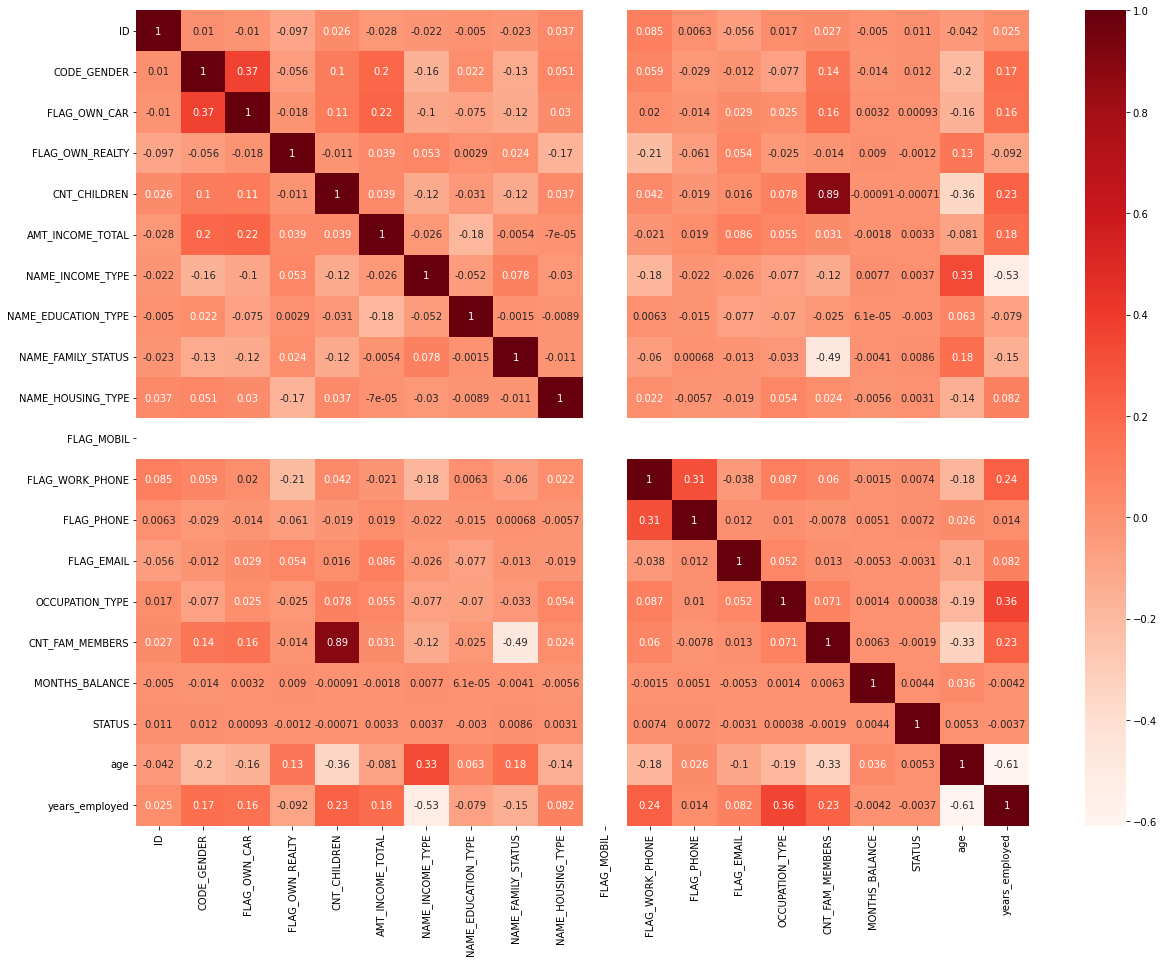

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='Reds')


In [ ]:

df= df.drop("CNT_CHILDREN", axis=1)

<Axes: >

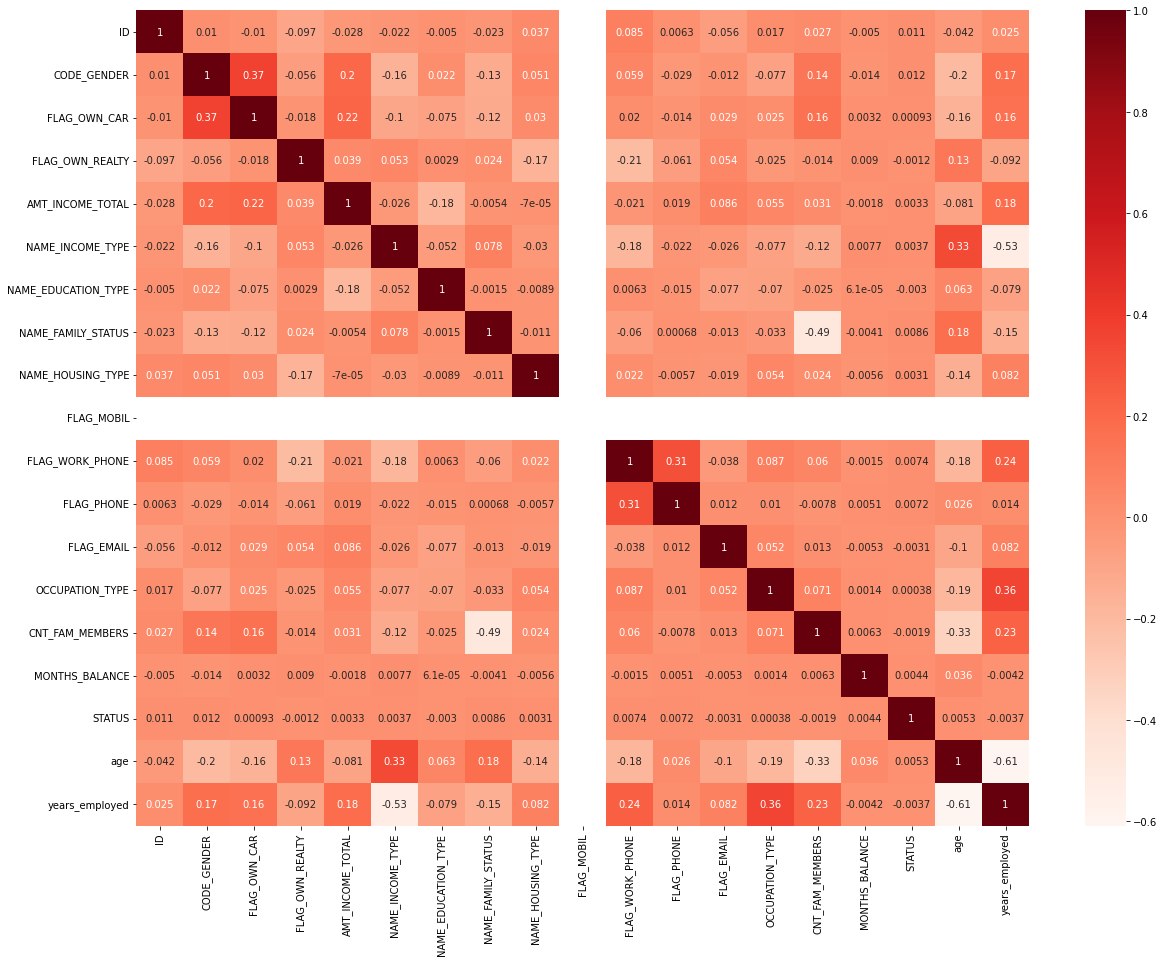

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

In [ ]:
df['STATUS'].value_counts()


0    774887
1      2828
Name: STATUS, dtype: int64

In [ ]:
df=df.drop(['ID'],axis=1)

In [ ]:
train = df.sample(frac=0.7, random_state=143)
test = df.drop(train.STATUS)

In [ ]:
X_train = train.drop('STATUS', axis=1)
y_train = train['STATUS']
X_test = test.drop('STATUS', axis=1)
y_test = test['STATUS']

**Model Building**

In [285]:
import numpy as np
from collections import Counter
import random

def gini_impurity(y):
    """Calculate the Gini impurity of a list of class labels."""
    counter = Counter(y)
    impurity = 1
    for label in counter:
        prob = counter[label] / len(y)
        impurity -= prob ** 2
    return impurity

def split_data(X, y, feature, threshold):
    """Split the data based on a feature and threshold."""
    left_X, left_y, right_X, right_y = [], [], [], []
    for i in range(len(X)):
        if X[i][feature] < threshold:
            left_X.append(X[i])
            left_y.append(y[i])
        else:
            right_X.append(X[i])
            right_y.append(y[i])
    return np.array(left_X), np.array(left_y), np.array(right_X), np.array(right_y)

def find_best_split(X, y):
    """Find the best feature and threshold to split the data."""
    best_feature, best_threshold, best_gini = None, None, 1
    for feature in range(X.shape[1]):
        thresholds = list(set(X[:, feature]))
        if len(thresholds) == 1:
            continue  # skip if all values in feature are the same
        for threshold in thresholds:
            left_X, left_y, right_X, right_y = split_data(X, y, feature, threshold)
            if len(left_y) == 0 or len(right_y) == 0:
                continue
            gini = (len(left_y) / len(y)) * gini_impurity(left_y) + (len(right_y) / len(y)) * gini_impurity(right_y)
            if gini < best_gini:
                best_feature, best_threshold, best_gini = feature, threshold, gini
    return best_feature, best_threshold

class DecisionTree:
    """A decision tree for classification."""
    
    def __init__(self, max_depth=None):
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None
        self.max_depth = max_depth
    
    def fit(self, X, y, depth=0):
        """Build the decision tree recursively."""
        if self.max_depth is not None and depth >= self.max_depth:
            self.label = Counter(y).most_common()[0][0]
            return
        if len(set(y)) == 1:
            self.label = y[0]
            return
        best_feature, best_threshold = find_best_split(X, y)
        self.feature = best_feature
        self.threshold = best_threshold
        left_X, left_y, right_X, right_y = split_data(X, y, best_feature, best_threshold)
        self.left = DecisionTree(max_depth=self.max_depth)
        self.right = DecisionTree(max_depth=self.max_depth)
        self.left.fit(left_X, left_y, depth+1)
        self.right.fit(right_X, right_y, depth+1)
    
    def predict(self, X):
        """Make predictions for a list of samples."""
        predictions = []
        for sample in X:
            node = self
            while node.label is None:
                if sample[node.feature] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions.append(node.label)
        return np.array(predictions)

class RandomForestClassifier:
    """A random forest classifier."""
    
    def __init__(self,n_trees=10, n_estimators=100, max_depth=None, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
    
    def fit(self, X, y):
        """Build the random forest classifier."""
        self.trees = []
        self.feature_indices = []
        n_features = X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))
        for i in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            feature_indices = random.sample(range(n_features), self.max_features)
            self.feature_indices.append(feature_indices)
            tree_X = X[:, feature_indices]
            tree.fit(tree_X, y)
            self.trees.append(tree)
    
    def predict(self, X):
        """Make predictions for a list of samples."""
        predictions = []
        for i in range(self.n_trees):
            tree = self.trees[i]
            feature_indices = self.feature_indices[i]
            tree_X = X[:, feature_indices]
            tree_predictions = tree.predict(tree_X)
            predictions.append(tree_predictions)
        predictions = np.array(predictions)
        return np.apply_along_axis(lambda x: Counter(x).most_common()[0][0], axis=0, arr=predictions)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,max_depth=5,max_features=5)
clf.fit(X_train.values,y_train.values.ravel())

# Make predictions on the test data
y_pred = clf.predict(X_test.values)


In [283]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [284]:
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9963636971479196


In [286]:
# define the GridSearch function
def grid_search(X_train, y_train, X_test, y_test, n_trees_range, max_depth_range, min_samples_split_range):
    best_accuracy = 0
    best_params = None
    for n_trees in n_trees_range:
        for max_depth in max_depth_range:
            for min_samples_split in min_samples_split_range:
                # train the classifier using the current hyperparameters
                trees = random_forest(X_train, y_train, n_trees)
                y_pred = predict(X_test, trees)
                # evaluate the performance of the classifier
                accuracy, _, _, _, _ = evaluate(y_test, y_pred)
                # update the best hyperparameters if necessary
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'n_trees': n_trees, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
    return best_params



In [287]:

# Define the hyperparameters to search over
max_depth_list = [3, 5, 7, 9]
min_samples_split_list = [2, 3,4, 6, 8]
min_samples_leaf_list = [1, 2, 3, 4]
     